In [1]:
import pandas as pd

# DATA PATH
data_paths = [
    "train.csv",
    "test.csv"
    
    
]


# READ DATA
df = [pd.read_csv(f"C:\\Users\\nh013\\Desktop\\stroke prediction\\{path}") for path in data_paths]

# PRINT DATASET 
for i, df in enumerate(df):
    print(f"Dataset {i + 1} - {data_paths[i]}:")
    print(df)
    print("\n")

Dataset 1 - train.csv:
          id  gender   age  hypertension  heart_disease ever_married  \
0          0    Male  28.0             0              0          Yes   
1          1    Male  33.0             0              0          Yes   
2          2  Female  42.0             0              0          Yes   
3          3    Male  56.0             0              0          Yes   
4          4  Female  24.0             0              0           No   
...      ...     ...   ...           ...            ...          ...   
15299  15299  Female  22.0             0              0           No   
15300  15300  Female  46.0             1              0          Yes   
15301  15301  Female  75.0             0              0          Yes   
15302  15302    Male  46.0             0              0          Yes   
15303  15303  Female  14.0             0              0           No   

           work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0            Private          U

In [2]:
import pandas as pd

# DATA PATH
data_paths = [
    "train.csv",
    "test.csv"
]

# READ DATA
df = [pd.read_csv(f"C:\\Users\\nh013\\Desktop\\stroke prediction\\{path}") for path in data_paths]


# CHECK MISSING VALUES
for i, data_frame in enumerate(df):
    missing_values = data_frame.isnull().sum()
    print(f"\nMissing Values in DataFrame {i + 1}:")
    print(missing_values[missing_values > 0])

# CHECK FOR CATEGORICAL COL
for i, data_frame in enumerate(df):
    categorical_columns = data_frame.select_dtypes(include=['object']).columns
    print(f"\nCategorical Columns in DataFrame {i + 1}:")
    print(categorical_columns)


Missing Values in DataFrame 1:
Series([], dtype: int64)

Missing Values in DataFrame 2:
Series([], dtype: int64)

Categorical Columns in DataFrame 1:
Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

Categorical Columns in DataFrame 2:
Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

# DATA PATH
data_paths = [
    "train.csv",
    "test.csv"
]

# READ DATA
df = [pd.read_csv(f"C:\\Users\\nh013\\Desktop\\stroke prediction\\{path}") for path in data_paths]

# COMBINE TRAIN AND TEST DATA FOR PREPROCESSING 
df_combined = pd.concat(df, axis=0, ignore_index=True)

# DROP DUPLICATES ROWS
df_combined = df_combined.drop_duplicates()



# CONVERT CATEGORICAL TO NUMERICAL USING LABEL ENCODER
label_encoder = LabelEncoder()
for col in df_combined.select_dtypes(include='object').columns:
    df_combined[col] = label_encoder.fit_transform(df_combined[col])

    
    
# CONVET STRING TO FLOAT  
for col in df_combined.columns:
    if df_combined[col].dtype == 'object':
        try:
            df_combined[col] = df_combined[col].astype(float)
        except ValueError:
            pass

        
        
# HANDLEING OUTLIERS USING Z SCORE 
z_scores = zscore(df_combined.select_dtypes(include=['int64', 'float64']))
abs_z_scores = abs(z_scores)
outlier_rows = (abs_z_scores > 3).all(axis=1)
df_combined = df_combined[~outlier_rows]


# IMPUTE MISSING VALUES
imputer = SimpleImputer(strategy='mean')
df_combined = pd.DataFrame(imputer.fit_transform(df_combined), columns=df_combined.columns)


# NORMALIZE AND SCALE 
scaler = MinMaxScaler()
df_combined[df_combined.columns] = scaler.fit_transform(df_combined[df_combined.columns])


# SPLIT THE DATA BACK INTO TRAIN AND TEST SET 
df_train = df_combined.iloc[:len(df[0]), :]
df_test = df_combined.iloc[len(df[0]):, :]


print("Train Data:")
print(df_train.head())

print("\nTest Data:")
print(df_test.head())

Train Data:
         id  gender       age  hypertension  heart_disease  ever_married  \
0  0.000000     0.5  0.340820           0.0            0.0           1.0   
1  0.000039     0.5  0.401855           0.0            0.0           1.0   
2  0.000078     0.0  0.511719           0.0            0.0           1.0   
3  0.000118     0.5  0.682617           0.0            0.0           1.0   
4  0.000157     0.0  0.291992           0.0            0.0           0.0   

   work_type  Residence_type  avg_glucose_level       bmi  smoking_status  \
0        0.5             1.0           0.114881  0.238259        0.666667   
1        0.5             0.0           0.109752  0.155785        0.333333   
2        0.5             0.0           0.225339  0.343643        0.000000   
3        0.5             1.0           0.045887  0.211913        0.666667   
4        0.5             0.0           0.085843  0.211913        0.666667   

   stroke  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# DATA PATH
data_paths = [
    "train.csv",
    "test.csv"
]

# READ DATA
df = [pd.read_csv(f"C:\\Users\\nh013\\Desktop\\stroke prediction\\{path}") for path in data_paths]

# COMBINE TRAIN AND TEST DATA FOR PREPROCESSING 
df_combined = pd.concat(df, axis=0, ignore_index=True)

# DROP DUPLICATES ROWS
df_combined = df_combined.drop_duplicates()



# CONVERT CATEGORICAL TO NUMERICAL USING LABEL ENCODER
label_encoder = LabelEncoder()
for col in df_combined.select_dtypes(include='object').columns:
    df_combined[col] = label_encoder.fit_transform(df_combined[col])

    
    
# CONVET STRING TO FLOAT  
for col in df_combined.columns:
    if df_combined[col].dtype == 'object':
        try:
            df_combined[col] = df_combined[col].astype(float)
        except ValueError:
            pass

        
        
# HANDLEING OUTLIERS USING Z SCORE 
z_scores = zscore(df_combined.select_dtypes(include=['int64', 'float64']))
abs_z_scores = abs(z_scores)
outlier_rows = (abs_z_scores > 3).all(axis=1)
df_combined = df_combined[~outlier_rows]


# IMPUTE MISSING VALUES
imputer = SimpleImputer(strategy='mean')
df_combined = pd.DataFrame(imputer.fit_transform(df_combined), columns=df_combined.columns)


# NORMALIZE AND SCALE 
scaler = MinMaxScaler()
df_combined[df_combined.columns] = scaler.fit_transform(df_combined[df_combined.columns])


# SPLIT THE DATA BACK INTO TRAIN AND TEST SET 
df_train = df_combined.iloc[:len(df[0]), :]
df_test = df_combined.iloc[len(df[0]):, :]


# TARGET AND FEATURE 
X_train = df_train.drop("stroke", axis=1)
y_train = df_train["stroke"]

# SPLIT THE TEST DATA INTO FEATURES (X_TEST) ASSUMING THERE IS NO STROKE COL IN THE TEST SET
X_test = df_test.copy()


# DROP STROKE COL
X_test = X_test.drop('stroke', axis=1)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (15304, 11)
y_train shape: (15304,)
X_test shape: (10204, 11)


[0]	validation-logloss:0.61136
[1]	validation-logloss:0.54440
[2]	validation-logloss:0.48859
[3]	validation-logloss:0.44274
[4]	validation-logloss:0.40295
[5]	validation-logloss:0.36857
[6]	validation-logloss:0.33993
[7]	validation-logloss:0.31515
[8]	validation-logloss:0.29280
[9]	validation-logloss:0.27333
[10]	validation-logloss:0.25704
[11]	validation-logloss:0.24187
[12]	validation-logloss:0.22955
[13]	validation-logloss:0.21887
[14]	validation-logloss:0.20845
[15]	validation-logloss:0.19918
[16]	validation-logloss:0.19190
[17]	validation-logloss:0.18444
[18]	validation-logloss:0.17784
[19]	validation-logloss:0.17187
[20]	validation-logloss:0.16664
[21]	validation-logloss:0.16280
[22]	validation-logloss:0.15855
[23]	validation-logloss:0.15478
[24]	validation-logloss:0.15218
[25]	validation-logloss:0.14926
[26]	validation-logloss:0.14670
[27]	validation-logloss:0.14433
[28]	validation-logloss:0.14220
[29]	validation-logloss:0.14089
[30]	validation-logloss:0.13924
[31]	validation-lo

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

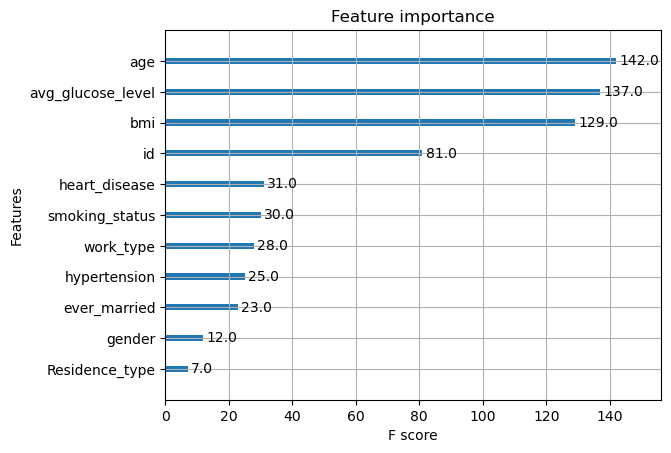

In [6]:
#perform xgboost mdoel to predict stroke 

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# DATA PATH
data_paths = [
    "train.csv",
    "test.csv"
]

# READ DATA
df = [pd.read_csv(f"C:\\Users\\nh013\\Desktop\\stroke prediction\\{path}") for path in data_paths]

# COMBINE TRAIN AND TEST DATA FOR PREPROCESSING 
df_combined = pd.concat(df, axis=0, ignore_index=True)

# DROP DUPLICATES ROWS
df_combined = df_combined.drop_duplicates()



# CONVERT CATEGORICAL TO NUMERICAL USING LABEL ENCODER
label_encoder = LabelEncoder()
for col in df_combined.select_dtypes(include='object').columns:
    df_combined[col] = label_encoder.fit_transform(df_combined[col])

    
    
# CONVET STRING TO FLOAT  
for col in df_combined.columns:
    if df_combined[col].dtype == 'object':
        try:
            df_combined[col] = df_combined[col].astype(float)
        except ValueError:
            pass

        
        
# HANDLEING OUTLIERS USING Z SCORE 
z_scores = zscore(df_combined.select_dtypes(include=['int64', 'float64']))
abs_z_scores = abs(z_scores)
outlier_rows = (abs_z_scores > 3).all(axis=1)
df_combined = df_combined[~outlier_rows]


# IMPUTE MISSING VALUES
imputer = SimpleImputer(strategy='mean')
df_combined = pd.DataFrame(imputer.fit_transform(df_combined), columns=df_combined.columns)


# NORMALIZE AND SCALE 
scaler = MinMaxScaler()
df_combined[df_combined.columns] = scaler.fit_transform(df_combined[df_combined.columns])


# SPLIT THE DATA BACK INTO TRAIN AND TEST SET 
df_train = df_combined.iloc[:len(df[0]), :]
df_test = df_combined.iloc[len(df[0]):, :]


# TARGET AND FEATURE 
X_train = df_train.drop("stroke", axis=1)
y_train = df_train["stroke"]

# SPLIT THE TEST DATA INTO FEATURES (X_TEST) ASSUMING THERE IS NO STROKE COL IN THE TEST SET
X_test = df_test.copy()


# DROP STROKE COL
X_test = X_test.drop('stroke', axis=1)

# SPLIT DATA INTO TRAINING AND VALIDATION SETS 
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#CONVERT THE DATASETS INTO DMATRIX FORMAT FOR XGBOOST 
dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
dval = xgb.DMatrix(X_val_split, label=y_val_split)

# SET HYPERPARAMETERS FOR MODEL
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# TRAIN MODEL
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds, evals=[(dval, 'validation')], early_stopping_rounds=10, verbose_eval=True)

# PREDICTION ON VALIDATION SETS 
y_val_pred = model.predict(dval)
y_val_pred_binary = [1 if proba >= 0.5 else 0 for proba in y_val_pred]

# EVALUATE THE MODLE ON VALIDATION SETS 
accuracy = accuracy_score(y_val_split, y_val_pred_binary)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# CONFUSION MATRIX AND CLASSIFICATION REPORT
conf_matrix = confusion_matrix(y_val_split, y_val_pred_binary)
class_report = classification_report(y_val_split, y_val_pred_binary)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# FEATURE IMPORTANCE
xgb.plot_importance(model)

[0]	validation-logloss:0.64686
[1]	validation-logloss:0.61016
[2]	validation-logloss:0.59937
[3]	validation-logloss:0.57001
[4]	validation-logloss:0.54568
[5]	validation-logloss:0.52595
[6]	validation-logloss:0.52069
[7]	validation-logloss:0.51484
[8]	validation-logloss:0.50990
[9]	validation-logloss:0.49441
[10]	validation-logloss:0.48172
[11]	validation-logloss:0.47076
[12]	validation-logloss:0.46538
[13]	validation-logloss:0.45616
[14]	validation-logloss:0.45413
[15]	validation-logloss:0.45238
[16]	validation-logloss:0.44362
[17]	validation-logloss:0.43709
[18]	validation-logloss:0.43041
[19]	validation-logloss:0.42562
[20]	validation-logloss:0.42140
[21]	validation-logloss:0.42027
[22]	validation-logloss:0.41632
[23]	validation-logloss:0.41311
[24]	validation-logloss:0.40802
[25]	validation-logloss:0.40549
[26]	validation-logloss:0.40261
[27]	validation-logloss:0.40149
[28]	validation-logloss:0.39885
[29]	validation-logloss:0.39566
[30]	validation-logloss:0.39297
[31]	validation-lo

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

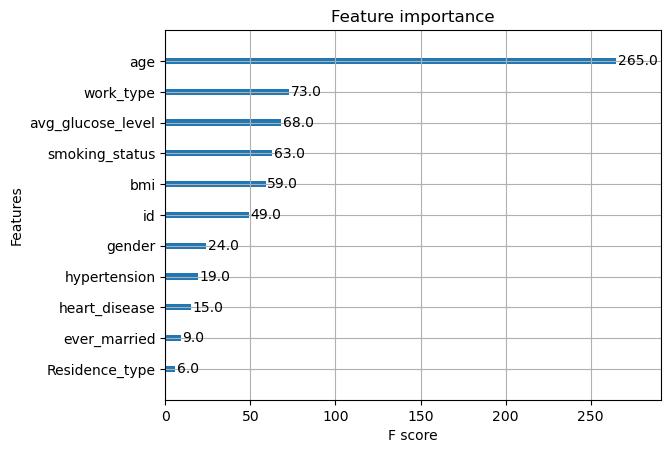

In [7]:

#Handling Class Imbalance used smote ........
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# DATA PATH
data_paths = [
    "train.csv",
    "test.csv"
]

# READ DATA
df = [pd.read_csv(f"C:\\Users\\nh013\\Desktop\\stroke prediction\\{path}") for path in data_paths]

# COMBINE TRAIN AND TEST DATA FOR PREPROCESSING 
df_combined = pd.concat(df, axis=0, ignore_index=True)

# DROP DUPLICATES ROWS
df_combined = df_combined.drop_duplicates()

# CONVERT CATEGORICAL TO NUMERICAL USING LABEL ENCODER
label_encoder = LabelEncoder()
for col in df_combined.select_dtypes(include='object').columns:
    df_combined[col] = label_encoder.fit_transform(df_combined[col])

# CONVET STRING TO FLOAT  
for col in df_combined.columns:
    if df_combined[col].dtype == 'object':
        try:
            df_combined[col] = df_combined[col].astype(float)
        except ValueError:
            pass

# HANDLEING OUTLIERS USING Z SCORE 
z_scores = zscore(df_combined.select_dtypes(include=['int64', 'float64']))
abs_z_scores = abs(z_scores)
outlier_rows = (abs_z_scores > 3).all(axis=1)
df_combined = df_combined[~outlier_rows]

# IMPUTE MISSING VALUES
imputer = SimpleImputer(strategy='mean')
df_combined = pd.DataFrame(imputer.fit_transform(df_combined), columns=df_combined.columns)

# NORMALIZE AND SCALE 
scaler = MinMaxScaler()
df_combined[df_combined.columns] = scaler.fit_transform(df_combined[df_combined.columns])

# SPLIT THE DATA BACK INTO TRAIN AND TEST SET 
df_train = df_combined.iloc[:len(df[0]), :]
df_test = df_combined.iloc[len(df[0]):, :]

# TARGET AND FEATURE 
X_train = df_train.drop("stroke", axis=1)
y_train = df_train["stroke"]

# SPLIT THE TEST DATA INTO FEATURES (X_TEST) ASSUMING THERE IS NO STROKE COL IN THE TEST SET
X_test = df_test.copy()


# DROP STROKE COL
X_test = X_test.drop('stroke', axis=1)

# SPLIT DATA INTO TRAINING AND VALIDATION SETS 
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



#OVERSAMPLE THE MINORITY CLASS USING SMOTE 
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_split, y_train_split)

#CONVERT RESAMPLED DATASETS INTO DMATRIX FORMAT 
dtrain_resampled = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dval = xgb.DMatrix(X_val_split, label=y_val_split)


# SET HYPERPARAMETERS FOR MODEL
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# TRAIN MODEL
num_rounds = 100
model_resampled = xgb.train(params, dtrain_resampled, num_rounds, evals=[(dval, 'validation')], early_stopping_rounds=10, verbose_eval=True)

# PREDICTION ON VALIDATION SETS
y_val_pred_resampled = model_resampled.predict(dval)
y_val_pred_binary_resampled = [1 if proba >= 0.5 else 0 for proba in y_val_pred_resampled]

# EVALUATE THE MODEL ON VALIDATION SETS
accuracy_resampled = accuracy_score(y_val_split, y_val_pred_binary_resampled)
print(f"Validation Accuracy after resampling: {accuracy_resampled * 100:.2f}%")

# CONFUSION MATRIX AND CLASSIFICATION MATRIX AFTER RESAMPLE
conf_matrix_resampled = confusion_matrix(y_val_split, y_val_pred_binary_resampled)
class_report_resampled = classification_report(y_val_split, y_val_pred_binary_resampled)

print("Confusion Matrix after resampling:\n", conf_matrix_resampled)
print("\nClassification Report after resampling:\n", class_report_resampled)

# FEATURE IMPORTANCE
xgb.plot_importance(model_resampled)
